In [1]:
import shioaji as sj
import pysimulation

api = sj.Shioaji(simulation=True)
accounts = api.login(
    api_key="5FpXzk4h7mF5PM9eHpP7yJSQK28DS5BAT2kxW6YSud6R",     # 請修改此處
    secret_key="9Qzboqh9dkZ5SVWmJYxx41HaG9tWQ3PiVt4NkLmfqGVk"   # 請修改此處
)

2023-06-05 14:11:24.211 | WARNING  | importlib._bootstrap:_call_with_frames_removed:219 - Optional: pip install shioaji[speed] for better performance.


Response Code: 0 | Event Code: 0 | Info: host '210.59.255.161:80', hostname '210.59.255.161:80' IP 210.59.255.161:80 (host 1 of 1) (host connection attempt 1 of 1) (total connection attempt 1 of 1) | Event: Session up


In [3]:
import datetime
import pandas as pd
import os

days = 366

# last_days = datetime.datetime.now() - datetime.timedelta(days=days)
last_days = datetime.date(2022, 6, 5)

kbars = api.kbars(
    contract=api.Contracts.Futures.TXF.TXFR1, 
    start=last_days.strftime("%Y-%m-%d"), 
    end=last_days.strftime("%Y-%m-%d"),
)

df = pd.DataFrame({**kbars})
df.ts = pd.to_datetime(df.ts)
df = df.set_index('ts')
df.index.name = None
df_1min = df

for i in range(days-1):
    date = last_days + datetime.timedelta(days=i+1)
    print(date.strftime("%Y-%m-%d"))
    kbars = api.kbars(
        contract=api.Contracts.Futures.TXF.TXFR1, 
        start=date.strftime("%Y-%m-%d"), 
        end=date.strftime("%Y-%m-%d"),
    )
    if kbars['ts'] != []:
        df = pd.DataFrame({**kbars})
        df.ts = pd.to_datetime(df.ts)
        df = df.set_index('ts')
        df.index.name = None
        df_1min = pd.concat([df_1min, df], axis=0)

df_1min = df_1min.between_time('08:45:00', '13:45:01')
df_1min = df_1min[['Open', 'High', 'Low', 'Close', 'Volume']]
df_1min.to_csv('TXF_1year_1min0605.csv')

2022-06-06
2022-06-07
2022-06-08
2022-06-09
2022-06-10
2022-06-11
2022-06-12
2022-06-13
2022-06-14
2022-06-15
2022-06-16
2022-06-17
2022-06-18
2022-06-19
2022-06-20
2022-06-21
2022-06-22
2022-06-23
2022-06-24
2022-06-25
2022-06-26
2022-06-27
2022-06-28
2022-06-29
2022-06-30
2022-07-01
2022-07-02
2022-07-03
2022-07-04
2022-07-05
2022-07-06
2022-07-07
2022-07-08
2022-07-09
2022-07-10
2022-07-11
2022-07-12
2022-07-13
2022-07-14
2022-07-15
2022-07-16
2022-07-17
2022-07-18
2022-07-19
2022-07-20
2022-07-21
2022-07-22
2022-07-23
2022-07-24
2022-07-25
2022-07-26
2022-07-27
2022-07-28
2022-07-29
2022-07-30
2022-07-31
2022-08-01
2022-08-02
2022-08-03
2022-08-04
2022-08-05
2022-08-06
2022-08-07
2022-08-08
2022-08-09
2022-08-10
2022-08-11
2022-08-12
2022-08-13
2022-08-14
2022-08-15
2022-08-16
2022-08-17
2022-08-18
2022-08-19
2022-08-20
2022-08-21
2022-08-22
2022-08-23
2022-08-24
2022-08-25
2022-08-26
2022-08-27
2022-08-28
2022-08-29
2022-08-30
2022-08-31
2022-09-01
2022-09-02
2022-09-03
2022-09-04

In [4]:
import pandas as pd
from backtesting.lib import OHLCV_AGG
import talib

df = pd.read_csv(f"TXF_1year_1min0605.csv", index_col=0)
df.index = pd.to_datetime(df.index)
df_resample = df.resample('5T', label='right', closed='right').agg(
    {'Open'  :'first',
     'High'  :'max',
     'Low'   :'min',
     'Close' :'last',
     'Volume':'sum'
    })
df_resample.dropna(axis=0, inplace=True)
# df_resample['HA_Close']=(df_resample['Open']+ df_resample['High']+ df_resample['Low']+df_resample['Close'])/4
# idx = df_resample.index.name
# df_resample.reset_index(inplace=True)
# for i in range(0, len(df_resample)):
#     if i == 0:
#         df_resample.at[i, 'HA_Open'] = ((df_resample._get_value(i, 'Open') + df_resample._get_value(i, 'Close')) / 2)
#     else:
#         df_resample.at[i, 'HA_Open'] = ((df_resample._get_value(i - 1, 'HA_Open') + df_resample._get_value(i - 1, 'HA_Close')) / 2)
# if idx:
#     df_resample.set_index(idx, inplace=True)
#     df_resample.index.name = None
# df_resample['HA_High']=df_resample[['HA_Open','HA_Close','High']].max(axis=1)
# df_resample['HA_Low']=df_resample[['HA_Open','HA_Close','Low']].min(axis=1)
# df_resample = df_resample.set_index('index')
# df_resample.index.name = None
df_resample

/Users/linzihjyun/opt/anaconda3/lib/python3.8/site-packages/backtesting/_plotting.py:50: UserWarning: Jupyter Notebook detected. Setting Bokeh output to notebook. This may not work in Jupyter clients without JavaScript support (e.g. PyCharm, Spyder IDE). Reset with `backtesting.set_bokeh_output(notebook=False)`.
  warnings.warn('Jupyter Notebook detected. '


Loading BokehJS ...

,Open,High,Low,Close,Volume
2022-06-06 08:50:00,16590.0,16626.0,16583.0,16624.0,3830.0
2022-06-06 08:55:00,16624.0,16646.0,16612.0,16644.0,1908.0
2022-06-06 09:00:00,16645.0,16645.0,16612.0,16612.0,1886.0
2022-06-06 09:05:00,16612.0,16612.0,16552.0,16553.0,6811.0
2022-06-06 09:10:00,16553.0,16555.0,16503.0,16512.0,5930.0
...,...,...,...,...,...
2023-06-05 13:25:00,16686.0,16688.0,16678.0,16686.0,1059.0
2023-06-05 13:30:00,16687.0,16688.0,16659.0,16675.0,2094.0
2023-06-05 13:35:00,16676.0,16679.0,16660.0,16660.0,1203.0
2023-06-05 13:40:00,16660.0,16675.0,16657.0,16674.0,1140.0


In [5]:
from backtesting import Strategy
from backtesting.lib import crossover
import talib as ta
import numpy as np

from datetime import time
from statistics import mean


class MacdKdCross2(Strategy): 
    fastperiod = 12
    slowperiod = 26
    signalperiod = 9
    long_sl = 990
    short_sl = 1010
    kd_period = 9
    div = 3

    long_high = -1
    long_low = -1
    short_high = -1
    short_low = -1

    thresholdTimelong = 0
    thresholdTimeshort = 0
#     thresholdTime = 0
    
    
    

    def init(self):
        
        self.dif, self.dea, self.hist = self.I(ta.MACD, self.data.Close, 
                                self.fastperiod, self.slowperiod, self.signalperiod)
        self.k, self.d = self.I(ta.STOCH, high=self.data.High, low=self.data.Low, close=self.data.Close, 
                                fastk_period=self.kd_period, slowk_period=self.div, slowd_period=self.div) # line K and D
        self.j = 3*self.k - 2*self.d
        self.ema = self.I(ta.EMA, self.data.Close, 7)

        

    def next(self):
        price = self.data.Close[-1]
        high = self.data.High[-1]
        low = self.data.Low[-1]
        jbar=60

        
        # 進場條件，時間在 13:30 之前，9:15 之後，且沒有持倉
#         DIF>0 且 DIF向上穿越DEA(MACD)且j>=50，則判定為起漲趨勢，記錄該根K線高低點
#         如果之後繼續突破高點，則買入
#         如果之後繼續跌破低點，則清掉高低點紀錄
#         DIF<0且 DEA向上穿越DIF且j<=50 ，則判定為起跌趨勢，記錄該根K線高低點
#         如果之後繼續跌破低點，則賣出
#         如果之後繼續突破高點，則清掉高低點紀錄
#         DIF>DEA 且 DIF向上穿越0且j>=50，則判定為起漲趨勢，記錄該根K線高低點
#         如果之後繼續突破高點，則買入
#         如果之後繼續跌破低點，則清掉高低點紀錄
#         DIF<DEA且 0向上穿越DIF且j<=50 ，則判定為起跌趨勢，記錄該根K線高低點
#         如果之後繼續跌破低點，則賣出
#         如果之後繼續突破高點，則清掉高低點紀錄

                
                
        if (self.data.index[-1].time() > time(8, 45)) and (self.data.index[-1].time() < time(13, 25)) and (not self.position.size) and self.short_low == -1 and self.long_high == -1:


            if crossover(self.dif , self.dea) and crossover(self.k , self.d) and price >= self.ema:    
                self.buy(size=200, sl= low)
                jbar=60
            elif crossover(self.dea , self.dif) and crossover(self.d , self.k) and price <= self.ema:
                self.sell(size=200, sl=high)
                jbar=60
            elif crossover(self.dif , self.dea) and self.dif >= -45 and self.j >= 45:    
                self.long_high = high
                self.long_low = low
                jbar=45
            elif crossover(self.dea , self.dif) and self.dif <= 10 and self.j <= 55:
                self.short_high = high
                self.short_low = low
                jbar=55
            elif self.dif >= self.dea and crossover(self.dif , 5) and self.j >= 75: 
                self.long_high = high
                self.long_low = low
                jbar=75
            elif self.dif <= self.dea and crossover(-25 , self.dif) and self.j <= 60:
                self.short_high = high
                self.short_low = low
                jbar=60
                

        elif (self.data.index[-1].time() > time(8, 45)) and (self.data.index[-1].time() < time(13, 25)) and (not self.position.size) and self.long_high != -1:
            if price >= self.long_high:# and self.data.Volume[-1] > 800:
                self.buy(size=200, sl= low)#, tp = self.data.Close[-1]*1.01)
                self.long_low = -1
                self.long_high = -1
                self.thresholdTimelong = 0
            elif price <= self.long_low or self.thresholdTimelong > 3:
                self.long_low = -1
                self.long_high = -1
                self.thresholdTimelong = 0
            else:
                self.thresholdTimelong += 1
        elif (self.data.index[-1].time() > time(8, 45)) and (self.data.index[-1].time() < time(13, 25)) and (not self.position.size) and self.short_low != -1:
            if price <= self.short_low:# and self.data.Volume[-1] > 800:
                self.sell(size=200, sl=high)#, tp = self.data.Close[-1]*0.99)
                self.short_high = -1
                self.short_low = -1
                self.thresholdTimeshort = 0
            elif price >= self.short_high or self.thresholdTimeshort > 3:
                self.short_high = -1
                self.short_low = -1
                self.thresholdTimeshort = 0
            else:
                self.thresholdTimeshort += 1
                


        
#         由記錄的低或高點為止損
#         J<=50且DIF<=DEA ，賣出平倉
#         J>=50且DIF>=DEA，買回平倉
#         當沖13:30平倉

        elif ((self.data.index[-1].time() >= time(13, 25)) or ( self.j <= jbar and self.hist <= 0) ) and self.position.is_long:
            self.position.close()

        elif ((self.data.index[-1].time() >= time(13, 25)) or (self.j >= jbar and self.hist >= 0) ) and self.position.is_short:
            self.position.close()

        elif self.position.is_long:# and price > self.trades[0].entry_price:
            self.trades[0].sl = min(self.data.Low[-1],self.data.Low[-2],self.data.Low[-3])
        elif self.position.is_short:# and price < self.trades[0].entry_price:
            self.trades[0].sl = max(self.data.High[-1],self.data.High[-2],self.data.High[-3])

            
            

In [6]:
from backtesting import Backtest

bt = Backtest(df_resample, MacdKdCross2, cash=500_000, commission=0.000033, hedging=False, margin=0.05)
stats = bt.run()
print(stats.to_string())
#print(stats['_trades'].to_string())
bt.plot(resample=False)
#bt.plot(resample=False, filename = "MACD_crossover_longshort_sar.html")

Start                                                   2022-06-06 08:50:00
End                                                     2023-06-05 13:45:00
Duration                                                  364 days 04:55:00
Exposure Time [%]                                                 16.830601
Equity Final [$]                                               1002694.1584
Equity Peak [$]                                                1023678.0534
Return [%]                                                       100.538832
Buy & Hold Return [%]                                              0.342878
Return (Ann.) [%]                                                105.166584
Volatility (Ann.) [%]                                             40.661973
Sharpe Ratio                                                       2.586362
Sortino Ratio                                                     13.512638
Calmar Ratio                                                      17.629185
Max. Drawdow

Row(id='1602', ...)

In [ ]:
stats['_trades'][-1]

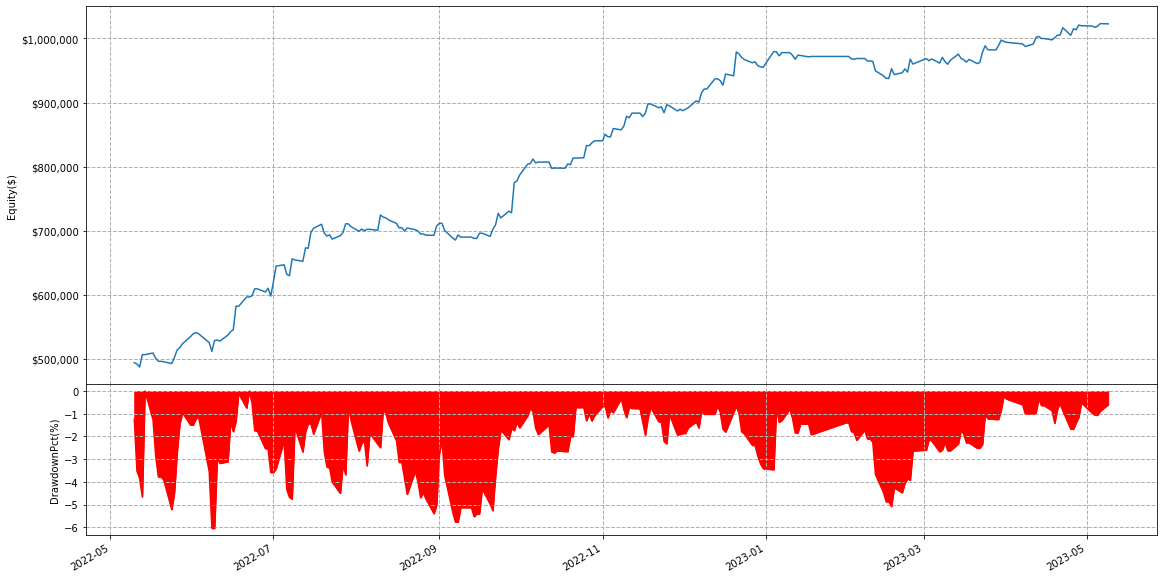

In [5]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
from matplotlib.ticker import StrMethodFormatter
from backtesting.lib import _EQUITY_AGG

equity_data = stats._equity_curve.resample('1D', label='right').agg(_EQUITY_AGG).dropna(how='all')
equity_data['DrawdownPct'] = equity_data['DrawdownPct'].multiply(-100)

f, (ax1, ax2) = plt.subplots(2, sharex=True, figsize=(19.2, 10.8), gridspec_kw={'height_ratios': [5, 2]})

ax1.grid(linestyle = '--', linewidth = 1)
ax1.plot(equity_data['Equity'])
ax1.set(ylabel="Equity($)")
ax1.yaxis.set_major_formatter(StrMethodFormatter('${x:,.0f}'))
date_form = DateFormatter("%Y-%m-%d")
ax1.xaxis.set_major_formatter(date_form)
ax1.xaxis.set_major_locator(mdates.DayLocator(interval=10))
ax2.grid(linestyle = '--', linewidth = 1)
ax2.plot(equity_data['DrawdownPct'], color="red")
ax2.set(ylabel="DrawdownPct(%)")
ax2.fill_between(equity_data['DrawdownPct'].index, equity_data['DrawdownPct'], where=(equity_data['DrawdownPct'] <= 0), color="red")   
f.subplots_adjust(hspace=0)
f.autofmt_xdate()

plt.show()

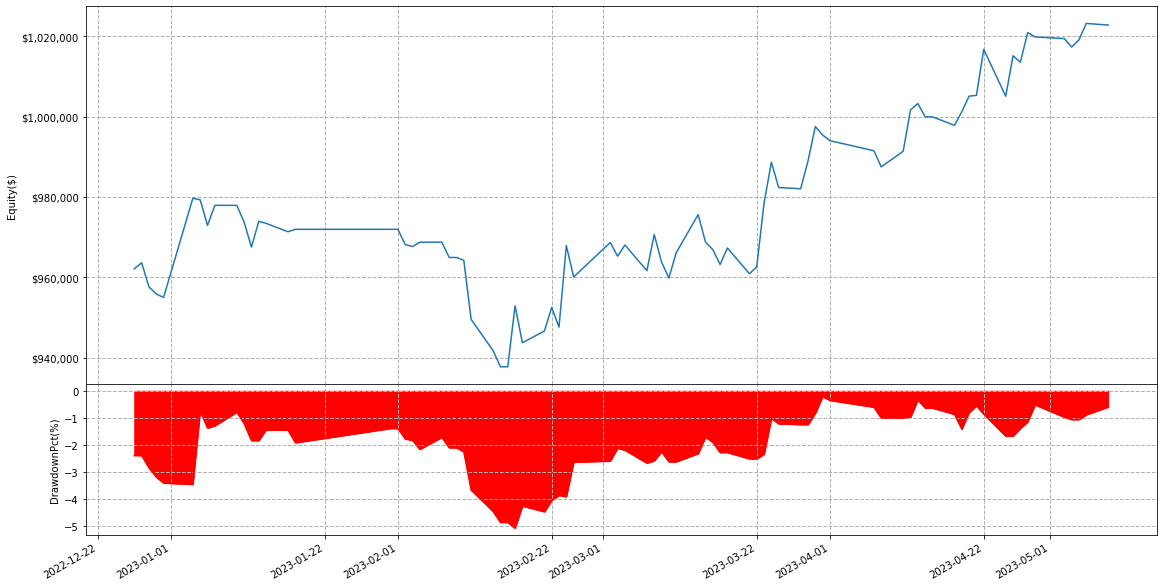

In [156]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
from matplotlib.ticker import StrMethodFormatter
from backtesting.lib import _EQUITY_AGG

equity_data = stats._equity_curve.resample('1D', label='right').agg(_EQUITY_AGG).dropna(how='all')
equity_data = equity_data[equity_data.index>"2022-12-24"]
equity_data['DrawdownPct'] = equity_data['DrawdownPct'].multiply(-100)

f, (ax1, ax2) = plt.subplots(2, sharex=True, figsize=(19.2, 10.8), gridspec_kw={'height_ratios': [5, 2]})

ax1.grid(linestyle = '--', linewidth = 1)
ax1.plot(equity_data['Equity'])
ax1.set(ylabel="Equity($)")
ax1.yaxis.set_major_formatter(StrMethodFormatter('${x:,.0f}'))
date_form = DateFormatter("%Y-%m-%d")
ax1.xaxis.set_major_formatter(date_form)
ax1.xaxis.set_major_locator(mdates.DayLocator(interval=10))
ax2.grid(linestyle = '--', linewidth = 1)
ax2.plot(equity_data['DrawdownPct'], color="red")
ax2.set(ylabel="DrawdownPct(%)")
ax2.fill_between(equity_data['DrawdownPct'].index, equity_data['DrawdownPct'], where=(equity_data['DrawdownPct'] <= 0), color="red")   
f.subplots_adjust(hspace=0)
f.autofmt_xdate()

plt.show()

In [119]:

df_in_sample = df_resample[df_resample.index <= '2023-1-8']
bt = Backtest(df_in_sample, MacdKdCross2, cash=500_000, commission=0.000033, hedging=False, margin=0.05)
# stats = bt.optimize(long_sl=range(900, 995, 5),
#                     short_sl=range(1005, 1100, 5),
#                     long_bar=range(-20, 20, 5),
#                     short_bar=range(-20, 20, 5), 
#                     maximize='Equity Final [$]',
#                     max_tries = 1000) # 快線週期<慢線週期
# stats = bt.optimize(j_bar=range(0, 100, 5),
#                     long_bar=range(-20, 20, 5),
#                     short_bar=range(-20, 20, 5), 
#                     maximize='Equity Final [$]',
#                     max_tries = 1000) # 快線週期<慢線週期
# stats = bt.optimize(j_bar=range(0, 100, 5),
#                     kd_period =range(1,20,1),
#                     div =range(1,20,1),
#                     maximize='Equity Final [$]',
#                     max_tries = 1000) # 快線週期<慢線週期
# stats = bt.optimize(j_bar1=range(0, 100, 5),
#                     fastperiod = range(5,25,1),
#                     slowperiod = range(15,30,1),
#                     kd_period =range(1,20,1),
#                     div =range(1,20,1),
#                     maximize='Equity Final [$]',
#                     max_tries = 1000)
#                     constraint =lambda param: param.fastperiod < param.slowperiod) # 快線週期<慢線週期
# stats = bt.optimize(j_bar1=range(0, 100, 5),
#                     long_bar=range(-50, 50, 5),
#                     maximize='Equity Final [$]',
#                     max_tries = 1000)
stats = bt.optimize(j_bar2=range(0, 100, 5),
                    short_bar=range(-50, 50, 5),
                    maximize='Equity Final [$]',
                    max_tries = 1000)
#stats = bt.run()
print(stats.to_string())
print(stats['_strategy'])

/Users/linzihjyun/opt/anaconda3/lib/python3.8/site-packages/backtesting/backtesting.py:1488: UserWarning: Searching for best of 400 configurations.
  output = _optimize_grid()
/Users/linzihjyun/opt/anaconda3/lib/python3.8/site-packages/backtesting/backtesting.py:1375: UserWarning: For multiprocessing support in `Backtest.optimize()` set multiprocessing start method to 'fork'.
  warnings.warn("For multiprocessing support in `Backtest.optimize()` "


  0%|          | 0/8 [00:00<?, ?it/s]

Start                                                   2022-05-09 08:50:00
End                                                     2023-01-06 13:45:00
Duration                                                  242 days 04:55:00
Exposure Time [%]                                                  2.582846
Equity Final [$]                                                604873.8582
Equity Peak [$]                                                 621045.6098
Return [%]                                                        20.974772
Buy & Hold Return [%]                                            -11.245675
Return (Ann.) [%]                                                 32.393309
Volatility (Ann.) [%]                                             17.581025
Sharpe Ratio                                                       1.842515
Sortino Ratio                                                      5.985124
Calmar Ratio                                                       5.271209
Max. Drawdow